(0.6, 0)
(0.6, 0.25)
(0.6, 0.5)
(0.6, 0.75)
(0.6, 1)
(0.7, 0)
(0.7, 0.25)
(0.7, 0.5)
(0.7, 0.75)
(0.7, 1)
(0.8, 0)
(0.8, 0.25)
(0.8, 0.5)
(0.8, 0.75)
(0.8, 1)
(0.9, 0)
(0.9, 0.25)
(0.9, 0.5)
(0.9, 0.75)
(0.9, 1)
(1, 0)
(1, 0.25)
(1, 0.5)
(1, 0.75)
(1, 1)


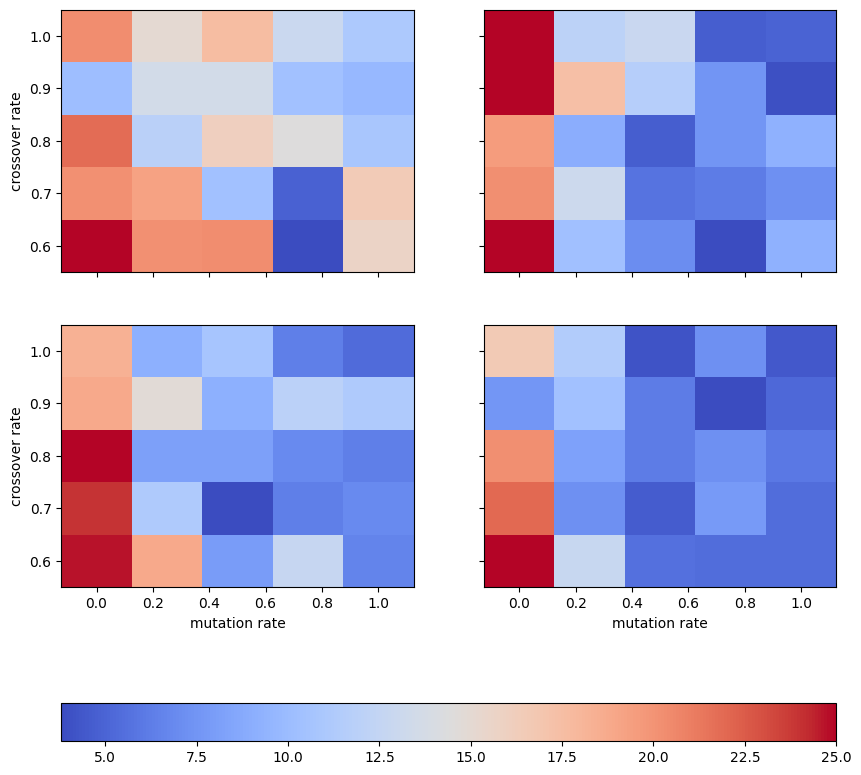

In [52]:
from index import main

r_cross_opts = (0.6, 0.7, 0.8, 0.9, 1)
r_mut_opts = (0, 0.25, 0.5, 0.75, 1)
results_pop_10_roulette = list()
results_pop_10_tournament = list()
results_pop_20_roulette = list()
results_pop_20_tournament = list()

for r_cross in r_cross_opts:
  row_results_pop_10_roulette = list()
  row_results_pop_10_tournament = list()
  row_results_pop_20_roulette = list()
  row_results_pop_20_tournament = list()

  for r_mut in r_mut_opts:
    print((r_cross, r_mut))
    row_results_pop_10_roulette.append(main('roulette', 10, r_cross, r_mut))
    row_results_pop_10_tournament.append(main('tournament', 10, r_cross, r_mut))
    row_results_pop_20_roulette.append(main('roulette', 20, r_cross, r_mut))
    row_results_pop_20_tournament.append(main('tournament', 20, r_cross, r_mut))

  results_pop_10_roulette.append(row_results_pop_10_roulette)
  results_pop_10_tournament.append(row_results_pop_10_tournament)
  results_pop_20_roulette.append(row_results_pop_20_roulette)
  results_pop_20_tournament.append(row_results_pop_20_tournament)

In [111]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

X, Y = np.meshgrid(r_mut_opts, r_cross_opts)

def plot_colormesh(func, vmax = 25):
  calc_z = lambda results: np.array([[func([len(sim_result[2]) for sim_result in col]) for col in row] for row in results])
  fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

  fig.set_figwidth(10)
  fig.set_figheight(12)

  meshopts = {'cmap': 'coolwarm', 'vmin': 0, 'vmax': vmax}
  surf = ax[0][0].pcolormesh(X, Y, calc_z(results_pop_10_roulette), **meshopts)
  ax[0][0].set_xlabel('mutation rate')
  ax[0][0].set_ylabel('crossover rate')
  ax[0][0].set_title('Population=10 (Roulette)')

  surf = ax[0][1].pcolormesh(X, Y, calc_z(results_pop_10_tournament), **meshopts)
  ax[0][1].set_xlabel('mutation rate')
  ax[0][1].set_ylabel('crossover rate')
  ax[0][1].set_title('Population=10 (Tournament)')

  surf = ax[1][0].pcolormesh(X, Y, calc_z(results_pop_20_roulette), **meshopts)
  ax[1][0].set_xlabel('mutation rate')
  ax[1][0].set_ylabel('crossover rate')
  ax[1][0].set_title('Population=20 (Roulette)')

  surf = ax[1][1].pcolormesh(X, Y, calc_z(results_pop_20_tournament), **meshopts)
  ax[1][1].set_xlabel('mutation rate')
  ax[1][1].set_ylabel('crossover rate')
  ax[1][1].set_title('Population=20 (Tournament)')

  fig.colorbar(surf, ax=ax, orientation='horizontal', pad=0.07)


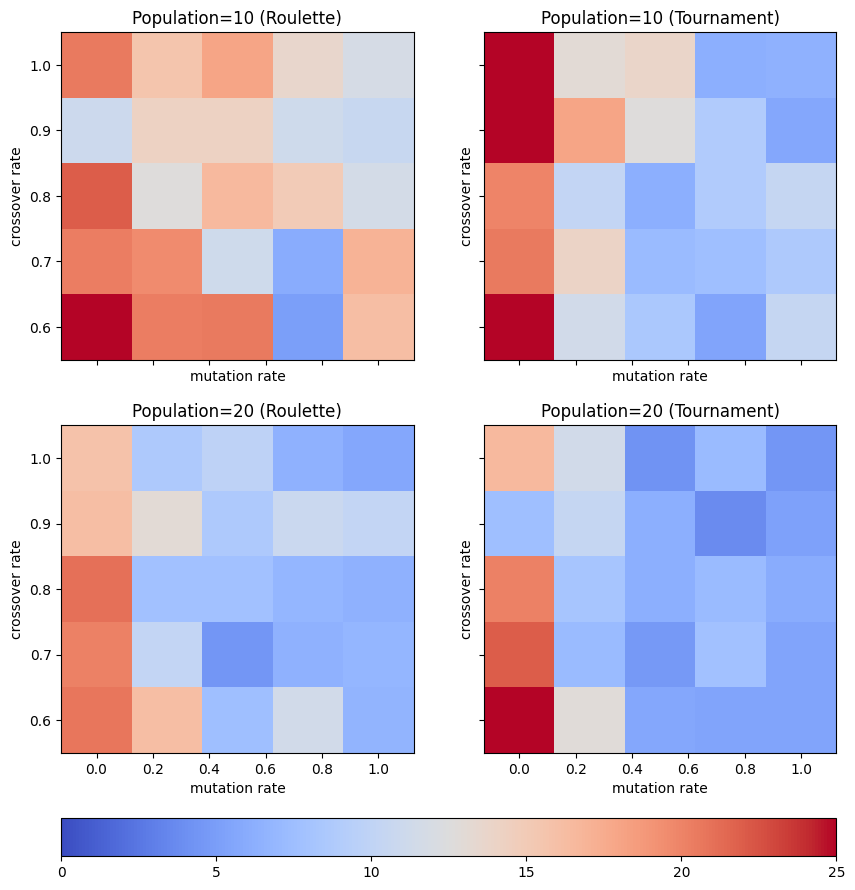

In [112]:
from statistics import mean
plot_colormesh(mean)

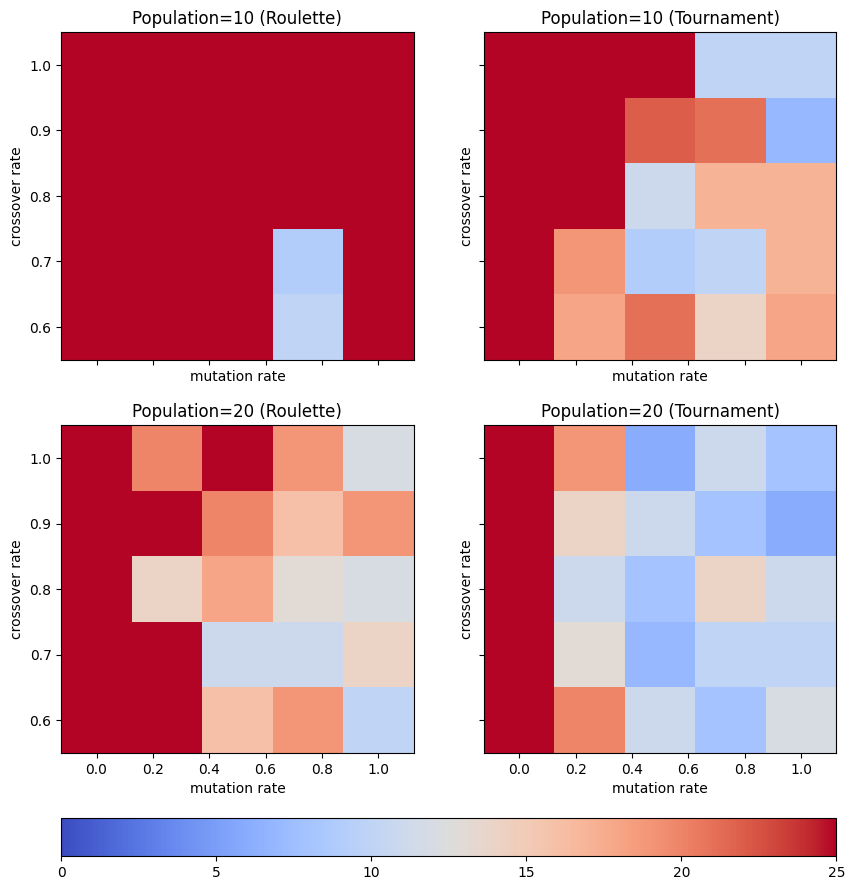

In [113]:
plot_colormesh(max)

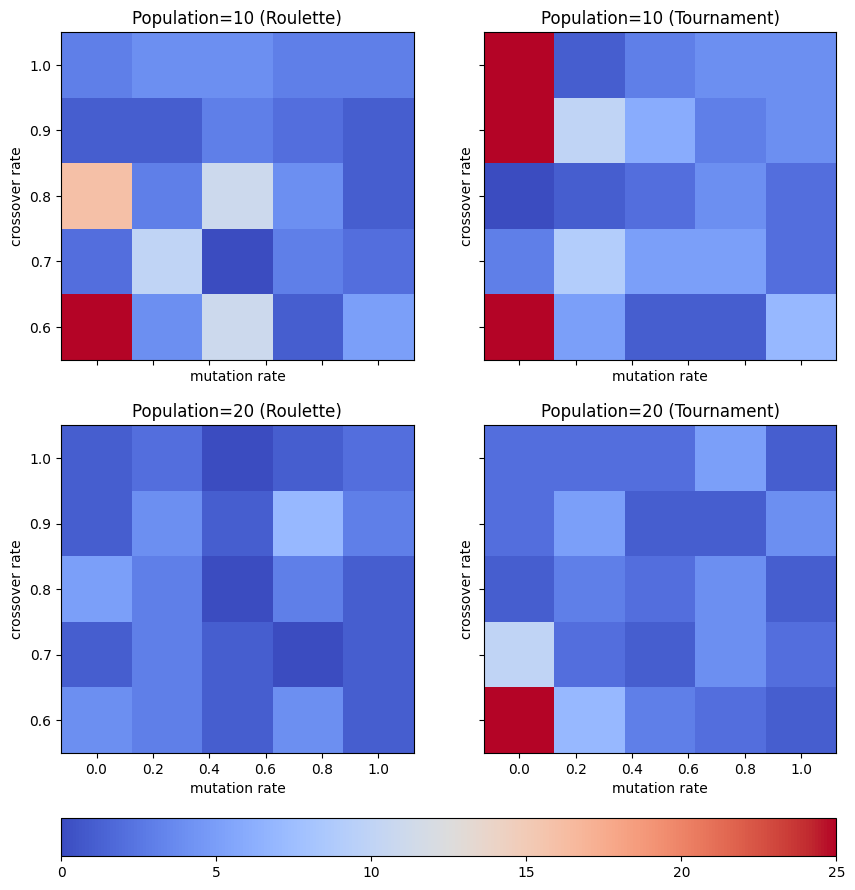

In [114]:
plot_colormesh(min)

(388, 4, 108)

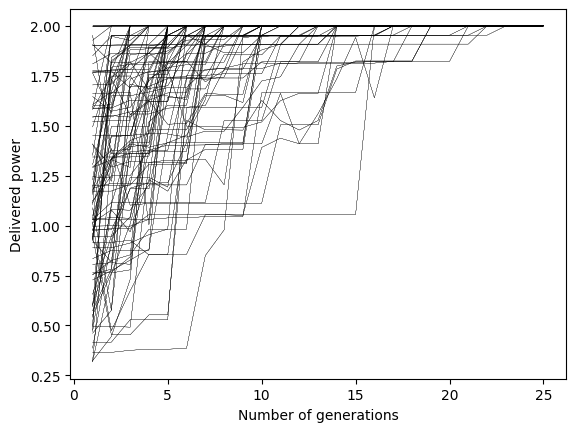

In [109]:
plt.figure()

quant_normal = 0
quant_primeira = 0
quant_nunca = 0

for result in (results_pop_10_roulette, results_pop_10_tournament, results_pop_20_roulette, results_pop_20_tournament):
  for row in results_pop_10_tournament:
    for col in row:
      for sim_result in col:
        scores_history = sim_result[2][0:25]
        if len(scores_history) == 0:
          quant_primeira += 1
          continue
        if sim_result[1] < 1.999:
          quant_nunca += 1
          continue
        if len(scores_history) < 25:
          last_score = scores_history[len(scores_history) - 1]
          scores_history += [last_score] * (25 - len(scores_history))
        plt.plot(range(1,26), scores_history, linewidth=0.1, color='black')
        quant_normal += 1
plt.xlabel('Number of generations')
plt.ylabel('Delivered power')
quant_normal, quant_primeira, quant_nunca